# Data Wrangling 

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
%matplotlib inline


## (a) Data Collection
### Locating the data, Data Loading, Data Joining

## (b) Data Organization

In [2]:
os.getcwd()

'/home/vizziwo/capcookie/notebooks'

In [3]:
os.listdir()

['.gitkeep',
 'BLM_data_wrangling.ipynb',
 'BLM_eda.ipynb',
 'merge_blm_and_census.ipynb',
 'old_notebooks',
 '.ipynb_checkpoints',
 'BLM_eda-Copy1.ipynb',
 'Untitled.ipynb',
 'scrap_notebooks',
 'blm_feature_engineering_archive.ipynb',
 'blm_feature_engineering.ipynb']

In [4]:
df = pd.read_csv("/home/vizziwo/capcookie/data/raw/fatal-police-shootings-data.csv")

## (c) Data Definition
#### In this step, I'll review colnames, data types, null values, count/percent per unique values or codes, the ranges of values or codes

In [5]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [7]:
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5428 entries, 0 to 5427
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5428 non-null   int64  
 1   name                     5428 non-null   object 
 2   date                     5428 non-null   object 
 3   manner_of_death          5428 non-null   object 
 4   armed                    5201 non-null   object 
 5   age                      5192 non-null   float64
 6   gender                   5426 non-null   object 
 7   race                     4900 non-null   object 
 8   city                     5428 non-null   object 
 9   state                    5428 non-null   object 
 10  signs_of_mental_illness  5428 non-null   bool   
 11  threat_level             5428 non-null   object 
 12  flee                     5179 non-null   object 
 13  body_camera              5428 non-null   bool   
dtypes: bool(2), float64(1), 

In [9]:
df.date = pd.to_datetime(df.date)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5428 entries, 0 to 5427
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       5428 non-null   int64         
 1   name                     5428 non-null   object        
 2   date                     5428 non-null   datetime64[ns]
 3   manner_of_death          5428 non-null   object        
 4   armed                    5201 non-null   object        
 5   age                      5192 non-null   float64       
 6   gender                   5426 non-null   object        
 7   race                     4900 non-null   object        
 8   city                     5428 non-null   object        
 9   state                    5428 non-null   object        
 10  signs_of_mental_illness  5428 non-null   bool          
 11  threat_level             5428 non-null   object        
 12  flee                     5179 non-

## Count of unique values or codes

In [11]:
df.nunique()

id                         5428
name                       5219
date                       1850
manner_of_death               2
armed                        93
age                          77
gender                        2
race                          6
city                       2477
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
dtype: int64

In [12]:
df.manner_of_death.value_counts()

shot                5157
shot and Tasered     271
Name: manner_of_death, dtype: int64

In [13]:
df.race.value_counts()

W    2479
B    1298
H     904
A      93
N      78
O      48
Name: race, dtype: int64

In [14]:
df.signs_of_mental_illness.value_counts()

False    4211
True     1217
Name: signs_of_mental_illness, dtype: int64

In [15]:
df.threat_level.value_counts()

attack          3504
other           1684
undetermined     240
Name: threat_level, dtype: int64

In [16]:
df.flee.value_counts()

Not fleeing    3421
Car             901
Foot            693
Other           164
Name: flee, dtype: int64

In [17]:
pd.set_option('display.max_rows',200)

In [18]:
df.armed.value_counts()

gun                                 3069
knife                                794
unarmed                              352
toy weapon                           187
undetermined                         166
vehicle                              138
unknown weapon                        79
machete                               44
Taser                                 26
ax                                    24
sword                                 22
baseball bat                          18
gun and knife                         17
hammer                                16
sharp object                          14
metal pipe                            13
screwdriver                           13
box cutter                            12
gun and car                           11
hatchet                               11
gun and vehicle                       10
crossbow                               9
scissors                               7
pipe                                   6
shovel          

## Range of Values per column

In [19]:
df[['date', 'age']].agg([min,max]).T

,min,max
date,2015-01-02 00:00:00,2020-06-22 00:00:00
age,6,91


In [20]:
df.age.describe()

count    5192.000000
mean       37.110747
std        13.119953
min         6.000000
25%        27.000000
50%        35.000000
75%        46.000000
max        91.000000
Name: age, dtype: float64

In [21]:
df.date.describe()

count                    5428
unique                   1850
top       2020-05-26 00:00:00
freq                        9
first     2015-01-02 00:00:00
last      2020-06-22 00:00:00
Name: date, dtype: object

## (d) Data Cleaning
### NA or missing data, Duplicates

In [22]:
nas = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=["percent"])

In [23]:
nas[nas.percent>0]

,percent
race,0.097273
flee,0.045873
age,0.043478
armed,0.041820
gender,0.000368


In [24]:
import missingno as msno

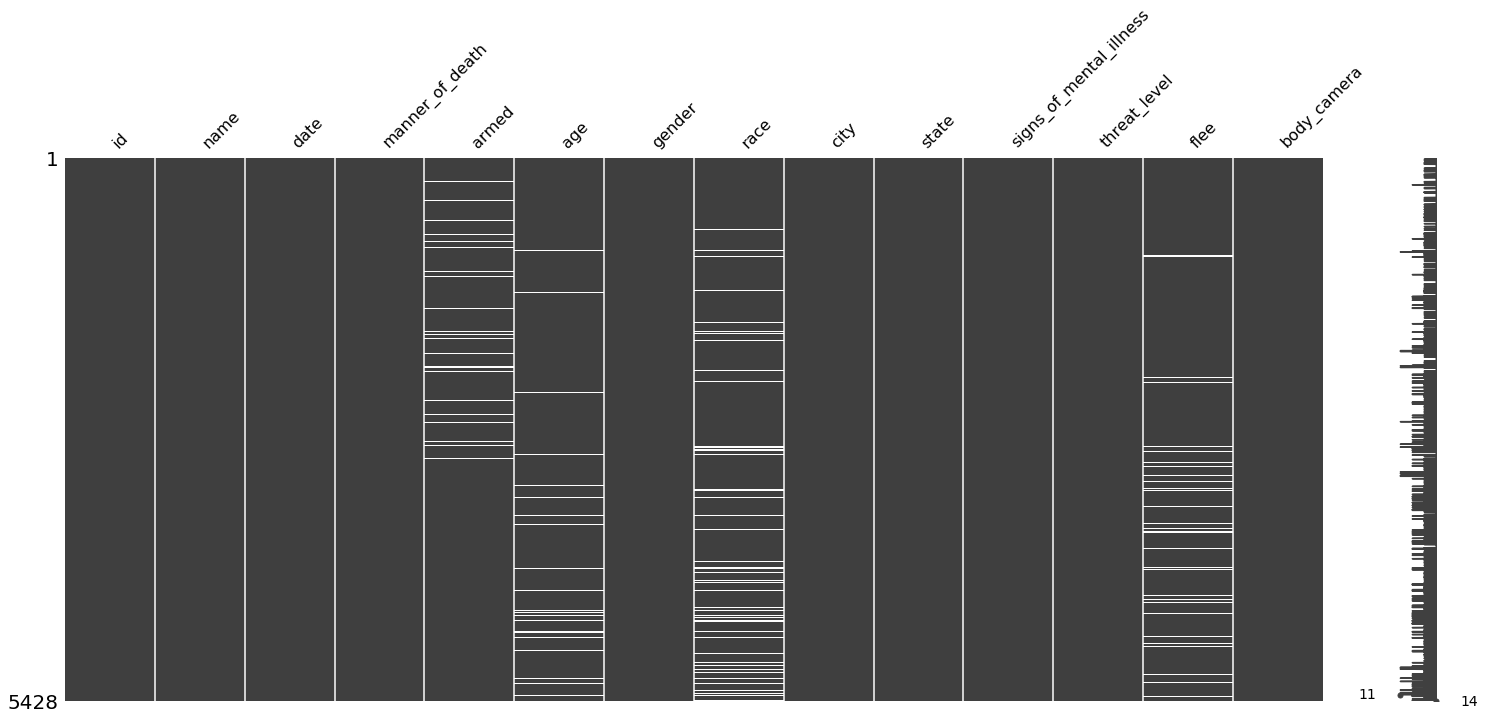

In [25]:
msno.matrix(df)

In [26]:
df.drop(index = df[df.race.isnull()].index, inplace=True)

In [27]:
df.reset_index(drop=True, inplace=True)

In [28]:
df.age.describe()

count    4815.000000
mean       36.530633
std        12.804425
min         6.000000
25%        27.000000
50%        34.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7c2bf1c11650>]],
      dtype=object)

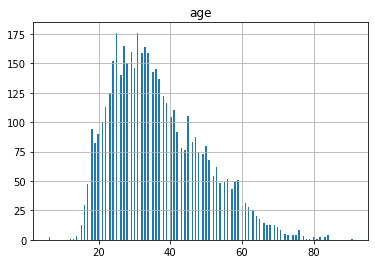

In [29]:
df.hist("age", bins=200)

In [30]:
meanage = df.age.mean()
df.age.fillna(meanage, inplace=True)

In [31]:
pd.options.display.min_rows=200
df[df.armed.isnull()].head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
15,29,Loren Simpson,2015-01-08,shot,NaN,28.0,M,W,Huntley,MT,False,undetermined,Not fleeing,False
26,49,Marcus Golden,2015-01-14,shot,NaN,24.0,M,B,St. Paul,MN,False,attack,Not fleeing,False
27,50,Michael Goebel,2015-01-14,shot,NaN,29.0,M,W,Franklin County,MO,False,attack,Not fleeing,False
45,85,Dewayne Carr,2015-01-20,shot,NaN,42.0,M,B,Scottsdale,AZ,False,other,Car,False
52,101,Demaris Turner,2015-01-23,shot,NaN,29.0,M,B,Fort Lauderdale,FL,False,other,Not fleeing,False


In [32]:
pd.options.display.min_rows=10

In [33]:
df.armed.fillna('undetermined', inplace=True)

In [34]:
df.flee.value_counts()

Not fleeing    3078
Car             820
Foot            642
Other           153
Name: flee, dtype: int64

In [35]:
df.flee.fillna('Other',inplace=True)

In [36]:
df[df.gender.isnull()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2543,2956,Scout Schultz,2017-09-16,shot,knife,21.0,NaN,W,Atlanta,GA,True,other,Not fleeing,False


In [37]:
df.gender.fillna('Nonbinary', inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4900 non-null   int64         
 1   name                     4900 non-null   object        
 2   date                     4900 non-null   datetime64[ns]
 3   manner_of_death          4900 non-null   object        
 4   armed                    4900 non-null   object        
 5   age                      4900 non-null   float64       
 6   gender                   4900 non-null   object        
 7   race                     4900 non-null   object        
 8   city                     4900 non-null   object        
 9   state                    4900 non-null   object        
 10  signs_of_mental_illness  4900 non-null   bool          
 11  threat_level             4900 non-null   object        
 12  flee                     4900 non-

In [39]:
df.duplicated().sum()

0

In [72]:
df.to_csv('/home/vizziwo/capcookie/data/processed/fatalwrangling.csv')